# Lecture 4: Chemical Reaction Equilibria and Roots of Equations

## Learning Objectives

By the end of this lecture, you will be able to:

- Understand and apply the concept of chemical equilibrium.
- Formulate and solve equilibrium problems analytically.
- Utilize numerical methods, including `scipy.optimize.minimize`, to find roots of equations in chemical equilibrium problems.

## Introduction to Chemical Reaction Equilibria

In the chemical sciences, understanding the equilibrium state of a reaction is essential for predicting the final concentrations of reactants and products in a system. The equilibrium state occurs when the [rates](https://doi.org/10.1351/goldbook.R05156) of the forward and reverse reactions are equal, resulting in no net change in the concentrations of the species involved. This state is also characterized by the minimization of the system's free energy, often represented by the [Gibbs free energy](https://doi.org/10.1351/goldbook.G02629) under conditions of constant temperature and pressure.

Consider a classic example of chemical equilibrium, the dissociation of water vapor into hydrogen and oxygen gases:

$$
2 \text{H}_2\text{O}(g) \rightleftharpoons 2 \text{H}_2(g) + \text{O}_2(g)
$$

At equilibrium, the reaction mixture obeys the [law of mass action](https://en.wikipedia.org/wiki/Law_of_mass_action), which relates the concentrations (or partial pressures) of the species to the equilibrium constant, $K_P$. The equilibrium constant is a quantity characterizing the extent to which a reaction proceeds.

## Mathematical Formulation of Equilibrium Problems

The equilibrium constant $K_P$ for a reaction is defined as the ratio of the product of the partial pressures of the products to the reactants, each raised to the power of their respective stoichiometric coefficients. For the reaction given above, $K_P$ can be expressed as:

$$
K_P = \frac{\left(\frac{P_{\text{H}_2}}{P^{\circ}}\right)^2 \left(\frac{P_{\text{O}_2}}{P^{\circ}}\right)}{\left(\frac{P_{\text{H}_2\text{O}}}{P^{\circ}}\right)^2}
$$

Where $P_{\text{H}_2}$, $P_{\text{O}_2}$, and $P_{\text{H}_2\text{O}}$ are the partial pressures of hydrogen, oxygen, and water vapor, respectively, and $P^{\circ}$ is the standard pressure, *i.e.*, 1 bar.

To find the equilibrium state, we use an ICE (Initial, Change, Equilibrium) table, which helps in setting up the mathematical expressions for the equilibrium concentrations or partial pressures.

**Example:**

Assume we start with 2 moles of water vapor in a closed system. At equilibrium, the changes in the number of moles of each species can be represented as follows:

|                            | $\text{H}_2\text{O}$       | $\text{H}_2$         | $\text{O}_2$        |
|----------------------------|----------------------------|----------------------|---------------------|
| **Initial (mol)**          | 2                          | 0                    | 0                   |
| **Change (mol)**           | $-2x$                      | $+2x$                | $+x$                |
| **Equilibrium (mol)**      | $2 - 2x$                   | $2x$                 | $x$                 |
| **Partial Pressure (bar)** | $\frac{2 - 2x}{2 + x} P$   | $\frac{2x}{2 + x} P$ | $\frac{x}{2 + x} P$ |

In this table:

- **Initial:** The starting number of moles of each species before the reaction reaches equilibrium.
- **Change:** The change in the number of moles of each species as the reaction proceeds toward equilibrium. Here, $x$ represents the extent of the reaction.
- **Equilibrium:** The number of moles of each species at equilibrium.
- **Partial Pressure:** The partial pressure of each species at equilibrium, assuming the total pressure is $P$.

## Solving for Equilibrium

To solve for the equilibrium partial pressures (or concentrations), you would typically:

1. Write the expression for the equilibrium constant $K_P$ using the equilibrium partial pressures.
2. Substitute the expressions from the ICE table into the $K_P$ equation.
3. Solve the resulting equation for $x$, the extent of the reaction.

This process often involves solving a nonlinear equation, which can be done analytically for simple cases or numerically for more complex reactions.

## Numerical Methods for Finding Roots of Equations

Traditional numerical root-finding algorithms include:

- **[Bisection Method](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html):** Iteratively narrows down the interval where a root lies by evaluating the midpoint.
- **[Newton-Raphson Method](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html):** Uses the derivative of the function to quickly converge to a root, requiring an initial guess.
- **[Secant Method](https://patrickwalls.github.io/mathematicalpython/root-finding/secant/):** Approximates the derivative using finite differences, avoiding the need for explicit derivatives.

## `scipy.optimize.minimize`: A Versatile Approach

[`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) is a powerful optimization tool that, while not a traditional root-finding algorithm by design, can be adapted to find roots by minimizing the absolute value of a function.

**Advantages:**

- **Broad Applicability:** Suitable for complex, multi-variable problems.
- **Flexibility:** Can work without explicit derivatives and allows for the inclusion of constraints.
- **Versatility:** Effective in a wide range of practical applications, particularly in chemical systems where certain parameters must remain within physical bounds.

## Implementing Root-Finding Methods in Python

To illustrate the process of finding roots using Python, let's solve a simple quadratic equation both analytically and numerically. Consider the quadratic equation:

$$
x^2 - 3x + 2 = 0
$$

Using the quadratic formula, the roots are:

$$
x = \frac{3 \pm \sqrt{(-3)^2 - 4 \cdot 1 \cdot 2}}{2 \cdot 1} = 2, 1
$$

Before we find these roots numerically, let's visualize the quadratic function $f(x) = x^2 - 3x + 2$ using Matplotlib to see where the roots lie. The roots are the points where the curve intersects the x-axis.

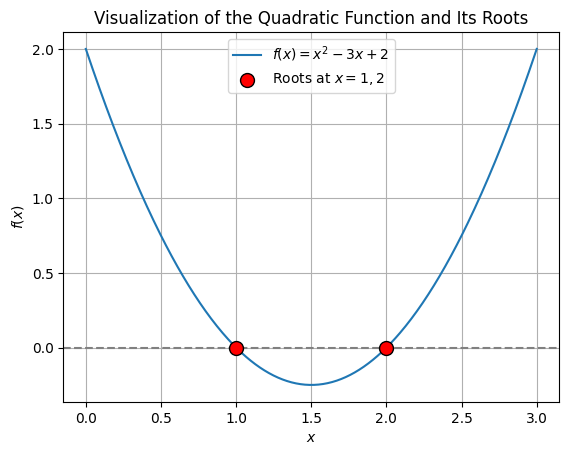

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the quadratic function
def quadratic_equation(x):
    return x ** 2 - 3 * x + 2

# Generate x values
x_values = np.linspace(0, 3, 400)

# Plot the function
plt.plot(x_values, quadratic_equation(x_values), label=r"$f(x) = x^2 - 3x + 2$")
plt.axhline(0, color='gray', linestyle='--')  # x-axis

# Highlight the roots with circles
roots = [1, 2]
plt.scatter(roots, [0, 0], color='red', edgecolor='black', s=100, zorder=5, label="Roots at $x = 1, 2$")

# Format and display the plot
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Visualization of the Quadratic Function and Its Roots")
plt.legend()
plt.grid(True)
plt.show()

Now, let's find these roots numerically using Python's `scipy.optimize.minimize` function. We'll approach this by minimizing the absolute value of the quadratic expression.

In [2]:
from scipy.optimize import minimize

# Define the objective function, which is the absolute value of the quadratic equation
def objective_function(x):
    return abs(x ** 2 - 3 * x + 2)

# Perform the minimization starting from an initial guess of x = 0
result = minimize(
    fun=objective_function,  # Objective function to minimize
    x0=0,                    # Initial guess
    method="Nelder-Mead",    # Optimization method
    tol=1e-6                 # Tolerance for convergence
)

print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 8.881784197001252e-16
             x: [ 1.000e+00]
           nit: 31
          nfev: 62
 final_simplex: (array([[ 1.000e+00],
                       [ 1.000e+00]]), array([ 8.882e-16,  9.766e-07]))


The output provides information about the optimization process. The `message` "Optimization terminated successfully" indicates that the method successfully (`success: True`) found a solution. The value of the objective function at the root `fun` is close to zero, which is expected because inserting the root into the quadratic equation should yield zero. **The root is found to be 1, which matches one of the analytical solutions.** The number of iterations `nit` and function evaluations `nfev` are also provided.

```{admonition} The Importance of Initial Guess
:class: warning
How does the choice of initial guess affect the outcome? For instance, what happens if the initial guess is set to 2.1 instead of 0?
```

Let's explore this by changing the initial guess:

In [3]:
# Perform the minimization starting from an initial guess of x = 2.1
result = minimize(
    fun=objective_function,
    x0=2.1,
    method="Nelder-Mead",
    tol=1e-6
)

print(result["x"][0])  # Observe how it converges to a different root

2.000000381469727


You can index the result dictionary to access the root found by the method. **In this case, the root is found to be 2, which is the other analytical solution.** This example demonstrates how the choice of initial guess can influence the root found by the numerical method.

```{admonition} Note
:class: note
The initial guess plays a crucial role in determining which root is found, especially in equations with multiple roots. For nonlinear or more complex equations, careful consideration of the initial guess is essential.
```

## Example: Chemical Reaction Equilibrium via Numerical Method

Let's use `scipy.optimize.minimize` to determine the equilibrium extent of the water-splitting reaction at 4000 K and 1 bar, where the equilibrium constant is $K_P = 1.22 \times 10^{-2}$. We aim to find the value of $x$, the reaction progress, that satisfies the equilibrium condition.

### Step 1: Formulating the Equilibrium Equation

The equilibrium equation for the reaction is given by:

$$
K_P = \frac{\left(\frac{P_{\text{H}_2}}{P^{\circ}}\right)^2 \left(\frac{P_{\text{O}_2}}{P^{\circ}}\right)}{\left(\frac{P_{\text{H}_2\text{O}}}{P^{\circ}}\right)^2}
$$

Substituting the partial pressures in terms of $x$ into the equation, we get:

$$
K_P = \frac{\left(\frac{2x}{2 + x}\frac{P}{P^{\circ}}\right)^2 \left(\frac{x}{2 + x}\frac{P}{P^{\circ}}\right)}{\left(\frac{2 - 2x}{2 + x}\frac{P}{P^{\circ}}\right)^2}
$$

Simplifying this expression, we obtain:

$$
K_P = \frac{4x^3}{(2 - 2x)^2 (2 + x)}
$$

Where $P = P^{\circ} = 1$ bar. The equilibrium equation to be minimized is:

$$
(2 - 2x)^2 (2 + x) K_P - 4x^3 = 0
$$

### Step 2: Minimizing the Equilibrium Equation

First, we define the objective function representing the equilibrium equation to be minimized:

In [4]:
def objective_function(x, K_P):
    equilibrium_equation = (2 - 2 * x) ** 2 * (2 + x) * K_P - 4 * x ** 3
    return abs(equilibrium_equation)

Before proceeding with the minimization, let's visualize the objective function to understand its behavior.

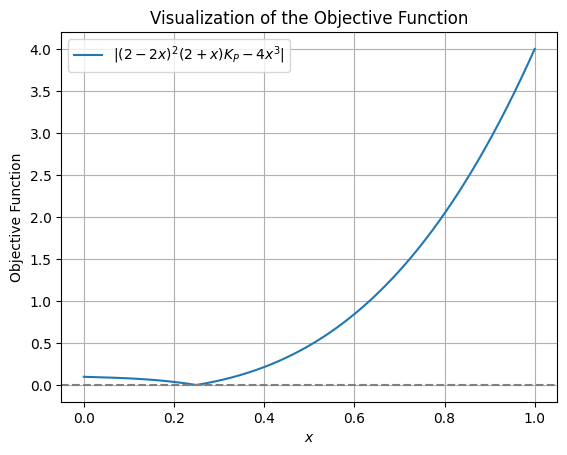

In [5]:
# Generate x values
x_values = np.linspace(0, 1, 400)

# Plot the function
plt.plot(x_values, objective_function(x_values, 1.22E-02), label=r"$|(2 - 2x)^2 (2 + x) K_P - 4x^3|$")
plt.axhline(0, color='gray', linestyle='--')  # x-axis

# Format and display the plot
plt.xlabel("$x$")
plt.ylabel("Objective Function")
plt.title("Visualization of the Objective Function")
plt.legend()
plt.grid(True)
plt.show()

```{admonition} Wait, What's the Expected Solution?
:class: warning
Before proceeding with the minimization, what value of $x$ do you expect as the equilibrium extent of the reaction? Reflect on this before running the code.
```

Now, let's use `scipy.optimize.minimize` to find the equilibrium extent of the reaction:

In [6]:
# Perform the minimization with an initial guess of x = 0
result = minimize(
    fun=objective_function,
    x0=0,
    args=(1.22E-02,),
    method="Nelder-Mead",
    tol=1e-6
)

print("{:.0f}%".format(result["x"][0] * 100))  # Convert the result to percentage

25%


The `print` statement converts the result to a percentage, representing the equilibrium extent of the reaction. The `{:.0f}` part indicates that the number should be formatted as a floating-point number (`f`), but with zero decimal places (`.0`). The `.format()` part is used to replace the `{:.0f}` placeholder with the actual value, which is the result of `result["x"][0] * 100`.

```{admonition} Warning
:class: warning
Always check that the solution is physically meaningful. For instance, in this context, $x$ must lie between 0 and 1 (representing 0% to 100% reaction progress). This can be enforced using bounds:
```

In [7]:
result = minimize(
    fun=objective_function,
    x0=2,  # Initial guess outside the expected range
    args=(1.22E-02,),
    method="Nelder-Mead",
    tol=1e-6,
    bounds=[(0, 1)]
)

print("{:.0f}%".format(result["x"][0] * 100))  # The bounds ensure the result stays within the physical limits.

25%


/var/folders/n9/q030dl3x6qgfqffys4wc7d4c0000gn/T/ipykernel_75226/1733916972.py:1: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(


The warning indicates that the initial guess is outside the specified bounds. However, the method still converges to the correct solution, which is 78% reaction progress.

## Hands-On Activity

Let's apply the `minimize` function to solve a cubic equation, which is analogous to solving for the equilibrium in a chemical reaction. Consider the cubic equation:

$$
x^3 - 6x^2 + 11x - 6 = 0
$$

This equation has three real roots. We will use different initial guesses to find these roots using the `minimize` function.

In [8]:
from scipy.optimize import minimize

# Define the cubic equation
def cubic_eq(x):
    return abs(x ** 3 - 6 * x ** 2 + 11 * x - 6)

# Root near x = 1
low_root_guess = minimize(
    fun=cubic_eq,
    x0=0.9,  # Initial guess close to 1
    method="Nelder-Mead",
    tol=1e-6
)
print("Root near 1:", low_root_guess["x"][0])  # Should be close to 1

# Root near x = 2
medium_root_guess = minimize(
    fun=cubic_eq,
    x0=1.9,  # Initial guess close to 2
    method="Nelder-Mead",
    tol=1e-6
)
print("Root near 2:", medium_root_guess["x"][0])  # Should be close to 2

# Root near x = 3
high_root_guess = minimize(
    fun=cubic_eq,
    x0=2.9,  # Initial guess close to 3
    method="Nelder-Mead",
    tol=1e-6
)
print("Root near 3:", high_root_guess["x"][0])  # Should be close to 3

Root near 1: 1.0000003051757815
Root near 2: 2.0000003433227533
Root near 3: 3.000000019073487


```{admonition} Exercise
:class: tip
Experiment with different initial guesses and observe how they affect the convergence of the method. Consider how close the result is to the expected root and reflect on the importance of choosing a good initial guess.
```

```{admonition} Additional Exercise
:class: tip
Modify the cubic equation to have different coefficients and use `scipy.optimize.minimize` to find the new roots. Reflect on how changes in the coefficients affect the roots and the convergence of the method.
```